In [1]:
'''
- No improvements from v2 results (video ID retrieval)
- around 89.35% of videos are correctly predicted.
- Deviation from actual start-time of answers from predicted start-time:
    (Effective-Error)
    - Roberta model:
        - Average of 99.3s or 10.76% of video, 
        - Average of 21.3s or 2.48% of video, ignoring 20% of outliers
    - DistilBert model:
        - Average of 98.4s or 10.65% of video, 
        - Average of 20.7s or 2.48% of video, ignoring 20% of outliers
    - No QA-model:
        - Average of 112.38s or 12.36% of video, 
        - Average of 37.17s or 4.55% of video, ignoring 20% of outliers
        - It may not look much worse, but if we look at graph we can notice much difference
            - Graph doesn't just rise in the end, it raises slowly from the start itself
'''
''''''

''

In [2]:
import pandas as pd
from utils import *

In [3]:
qdset = pd.read_csv('../yt-dset-questions-v1.csv')
dsetDetails = pd.read_csv('../yt-dset-vid-details.csv')
quesdset = qdset.join(dsetDetails.set_index('Video_ID'), on='Video_ID')

In [4]:
tdset = pd.read_csv('../v3-results/yt-dset-results-videoIds-trnidx.csv')
edset = pd.read_csv('../v3-results/yt-dset-results-videoIds-extidx.csv')
bdset = pd.read_csv('../v3-results/yt-dset-results-videoIds-bothidx.csv')
rob_ansdset = pd.read_csv('../v3-results/yt-dset-results-ans-rob.csv')
dis_ansdset = pd.read_csv('../v3-results/yt-dset-results-ans-dis.csv')
noqa_ansdset = pd.read_csv('../v3-results/yt-dset-results-ans-noqa.csv')

Video Id retrieval results:

In [5]:
correctVideoIds = list(quesdset['Video_ID'])
#Below will be compared

Overall result:


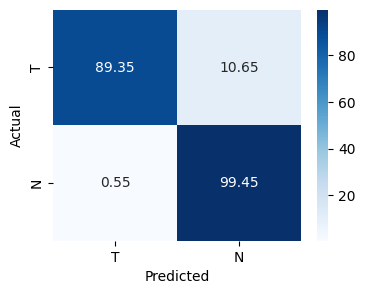

Confused pairs:  [[(401, 405), 29.17], [(107, 204), 19.51], [(401, 402), 9.09], [(401, 407), 8.33], [(207, 405), 6.9]]
Related Videos result:  [69.44, 30.56]


In [6]:
#Transcript Index
predictedVideoIds = list(tdset['Predicted_Video_ID'].astype('Int64'))
res = compareVidIds(correctVideoIds, predictedVideoIds)
print("Overall result:")
drawConfusionMatrix(res['totalResults'])
print("Confused pairs: ", res['confusedResults'])

relatedVideoIds = list(tdset['Related_Video_IDs'])
relRes = compareRelatedVids(correctVideoIds, predictedVideoIds, relatedVideoIds)
print("Related Videos result: ", relRes)

Overall result:


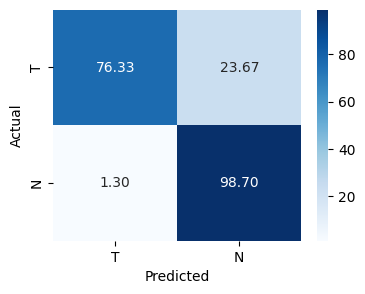

Confused pairs:  [[(406, 407), 25.0], [(107, 204), 24.39], [(105, 206), 18.42], [(401, 405), 16.67], [(204, 401), 14.81]]
Related Videos result:  [60.0, 40.0]


In [7]:
#Extracted-Text Index
predictedVideoIds = list(edset['Predicted_Video_ID'].astype('Int64'))
res = compareVidIds(correctVideoIds, predictedVideoIds)
print("Overall result:")
drawConfusionMatrix(res['totalResults'])
print("Confused pairs: ", res['confusedResults'])

relatedVideoIds = list(edset['Related_Video_IDs'])
relRes = compareRelatedVids(correctVideoIds, predictedVideoIds, relatedVideoIds)
print("Related Videos result: ", relRes)

Overall result:


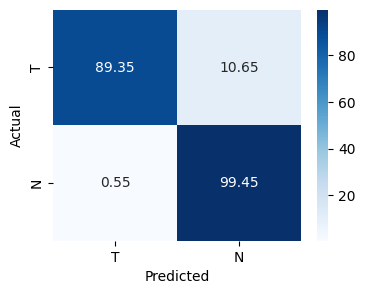

Confused pairs:  [[(107, 204), 21.95], [(401, 405), 20.83], [(401, 402), 9.09], [(401, 407), 8.33], [(204, 401), 7.41]]
Related Videos result:  [83.33, 16.67]


In [8]:
#Combined Index
predictedVideoIds = list(bdset['Predicted_Video_ID'].astype('Int64'))
res = compareVidIds(correctVideoIds, predictedVideoIds)
print("Overall result:")
drawConfusionMatrix(res['totalResults'])
print("Confused pairs: ", res['confusedResults'])

relatedVideoIds = list(bdset['Related_Video_IDs'])
relRes = compareRelatedVids(correctVideoIds, predictedVideoIds, relatedVideoIds)
print("Related Videos result: ", relRes)

Answer prediction results (Roberta):

In [9]:
dset = rob_ansdset.join(quesdset)
rightdset = dset[dset['Video_ID'] == dset['Predicted_Video_ID']]
rightdset.head()
#rightdset has only the rows with correct predicted IDs.

,Predicted_Video_ID,BestAnswer,BestAnswer_start,BestAnswer_end,LongAnswer,LongAnswer_start,LongAnswer_end,Related_Video_IDs,Video_ID,Question,Answer,Start_timestamp,End_timestamp,Duration,Link
0,101,an open source container orchestration framework,62,67,kubernetes is an open source container orchest...,62,67,NaN,101,What is Kubernetes?,kubernetes is an open source container orchest...,64,98,852,https://youtu.be/VnvRFRk_51k
1,101,google,67,70,open source container orchestration framework ...,62,70,NaN,101,Who developed Kubernetes?,Google,69,70,852,https://youtu.be/VnvRFRk_51k
2,101,google,67,70,open source container orchestration framework ...,62,70,NaN,101,Who created Kubernetes?,Google,69,70,852,https://youtu.be/VnvRFRk_51k
3,101,manages containers,70,75,manages containers be docker containers,70,75,NaN,101,What is the job of controller manager in Kuber...,controller manager which basically keeps an ov...,321,332,852,https://youtu.be/VnvRFRk_51k
4,101,scheduling containers on different nodes based...,337,346,scheduling containers on different nodes based...,337,346,406,101,What is the job of scheduler in Kubernetes?,scheduler which is basically responsible for s...,336,360,852,https://youtu.be/VnvRFRk_51k


100% Mean: 10.81
80% Mean: 2.47


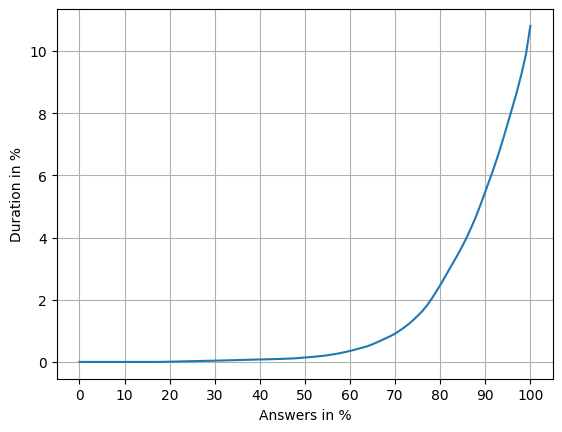

100% Mean: 99.7
80% Mean: 21.26


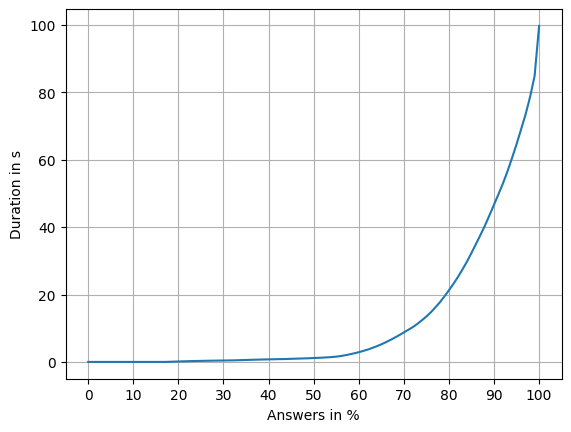

In [10]:
#Best-Answers
errs = list((abs(rightdset['Start_timestamp']-rightdset['BestAnswer_start'])*100)/rightdset['Duration'])
showAvgPlots(errs, ylabel='Duration in %')
errs = list(abs(rightdset['Start_timestamp']-rightdset['BestAnswer_start']))
showAvgPlots(errs, ylabel='Duration in s')

100% Mean: 10.72
80% Mean: 2.49


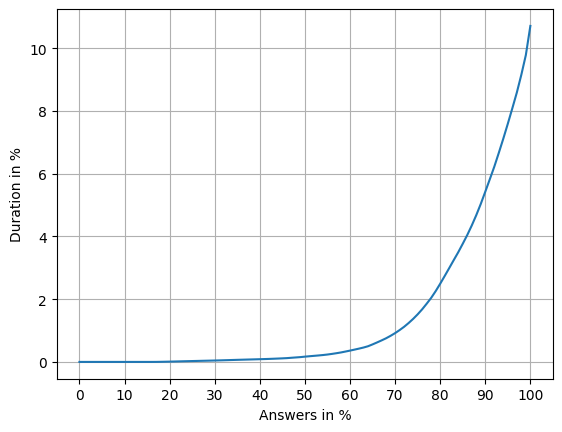

100% Mean: 98.89
80% Mean: 21.22


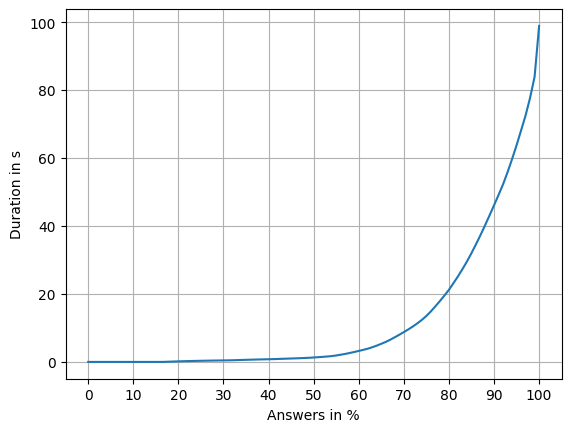

In [11]:
#Long-Answers
errs = list((abs(rightdset['Start_timestamp']-rightdset['LongAnswer_start'])*100)/rightdset['Duration'])
showAvgPlots(errs, ylabel='Duration in %')
errs = list(abs(rightdset['Start_timestamp']-rightdset['LongAnswer_start']))
showAvgPlots(errs, ylabel='Duration in s')

100% Mean: 10.76
80% Mean: 2.48


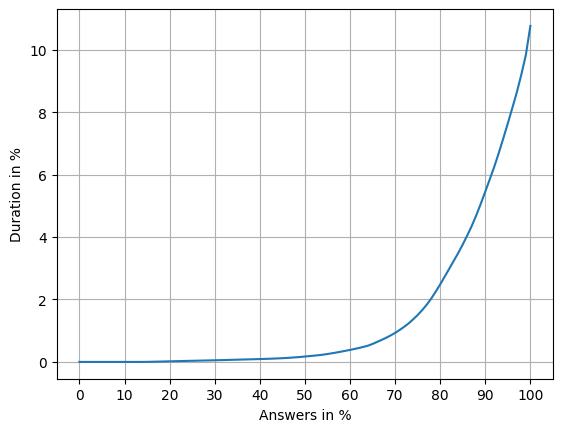

100% Mean: 99.29
80% Mean: 21.29


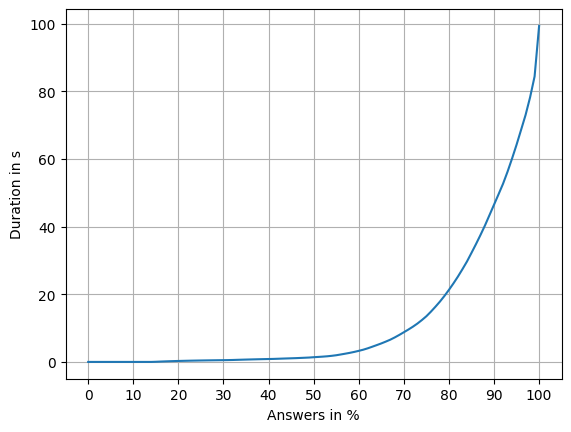

In [12]:
#Effective-Error
prob1 = 0.5 #to choose best
prob2 = 0.5 #to choose worst
errs1 = list((abs(rightdset['Start_timestamp']-rightdset['BestAnswer_start'])*100)/rightdset['Duration'])
errs2 = list((abs(rightdset['Start_timestamp']-rightdset['LongAnswer_start'])*100)/rightdset['Duration'])
errs  = [min(errs1[i], errs2[i])*prob1 + max(errs1[i], errs2[i])*prob2 for i in range(len(errs1))]
showAvgPlots(errs, ylabel='Duration in %')
errs1 = list(abs(rightdset['Start_timestamp']-rightdset['BestAnswer_start']))
errs2 = list(abs(rightdset['Start_timestamp']-rightdset['LongAnswer_start']))
errs  = [errs1[i]*0.5 + errs2[i]*0.5 for i in range(len(errs1))]
showAvgPlots(errs, ylabel='Duration in s')

Answer prediction results (Distilbert):

In [13]:
dset = dis_ansdset.join(quesdset)
rightdset = dset[dset['Video_ID'] == dset['Predicted_Video_ID']]
rightdset.head()
#rightdset has only the rows with correct predicted IDs.

,Predicted_Video_ID,BestAnswer,BestAnswer_start,BestAnswer_end,LongAnswer,LongAnswer_start,LongAnswer_end,Related_Video_IDs,Video_ID,Question,Answer,Start_timestamp,End_timestamp,Duration,Link
0,101,an open source container orchestration framework,62,67,problem solution case study of Cabezas basical...,8,67,NaN,101,What is Kubernetes?,kubernetes is an open source container orchest...,64,98,852,https://youtu.be/VnvRFRk_51k
1,101,google,67,70,originally developed by google,67,70,NaN,101,Who developed Kubernetes?,Google,69,70,852,https://youtu.be/VnvRFRk_51k
2,101,google,67,70,a kubernetes cluster user would use to create ...,42,70,NaN,101,Who created Kubernetes?,Google,69,70,852,https://youtu.be/VnvRFRk_51k
3,101,what is the role of each one of those componen...,38,49,what is the role of each one of those componen...,38,60,NaN,101,What is the job of controller manager in Kuber...,controller manager which basically keeps an ov...,321,332,852,https://youtu.be/VnvRFRk_51k
4,101,scheduling containers on different nodes based...,337,346,scheduling containers on different nodes based...,337,346,406,101,What is the job of scheduler in Kubernetes?,scheduler which is basically responsible for s...,336,360,852,https://youtu.be/VnvRFRk_51k


100% Mean: 10.59
80% Mean: 2.42


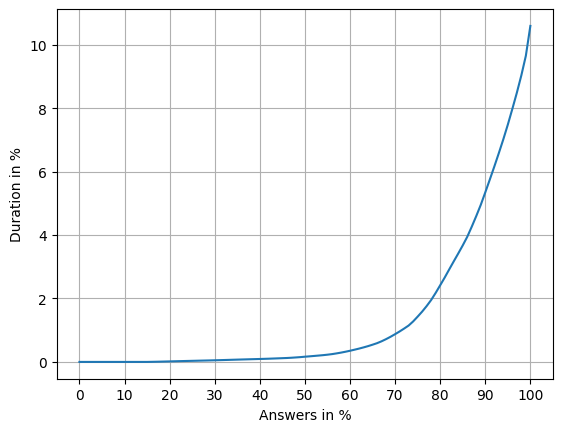

100% Mean: 97.98
80% Mean: 20.17


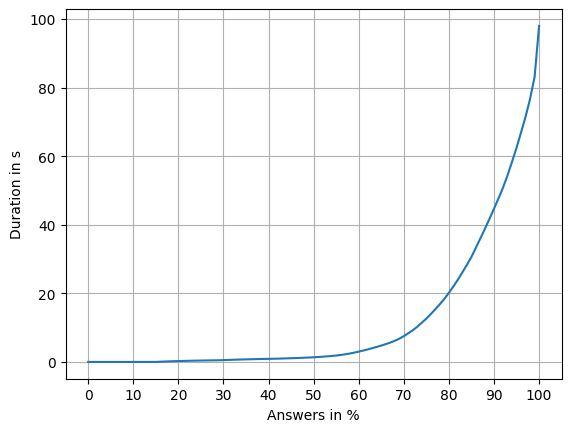

In [14]:
#Best-Answers
errs = list((abs(rightdset['Start_timestamp']-rightdset['BestAnswer_start'])*100)/rightdset['Duration'])
showAvgPlots(errs, ylabel='Duration in %')
errs = list(abs(rightdset['Start_timestamp']-rightdset['BestAnswer_start']))
showAvgPlots(errs, ylabel='Duration in s')

100% Mean: 10.7
80% Mean: 2.53


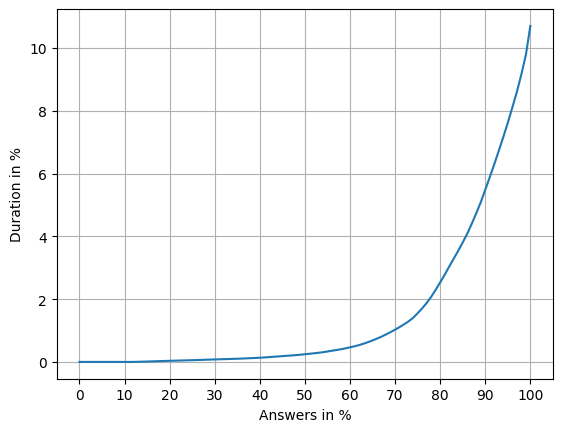

100% Mean: 98.78
80% Mean: 21.23


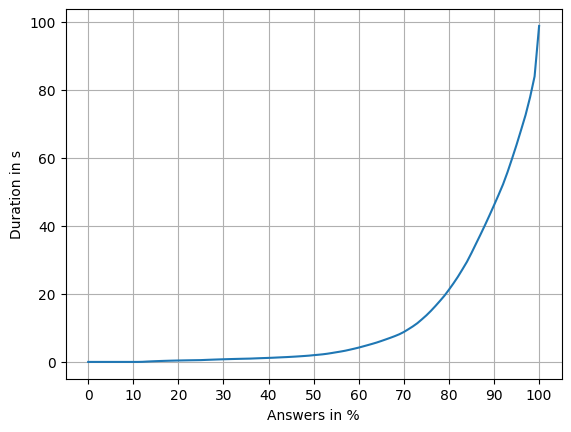

In [15]:
#Long-Answers
errs = list((abs(rightdset['Start_timestamp']-rightdset['LongAnswer_start'])*100)/rightdset['Duration'])
showAvgPlots(errs, ylabel='Duration in %')
errs = list(abs(rightdset['Start_timestamp']-rightdset['LongAnswer_start']))
showAvgPlots(errs, ylabel='Duration in s')

100% Mean: 10.65
80% Mean: 2.48


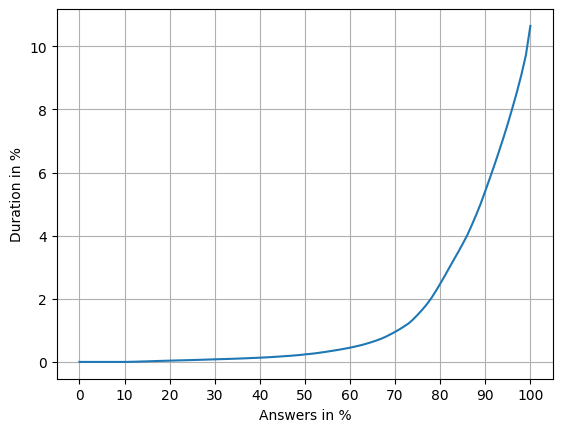

100% Mean: 98.38
80% Mean: 20.71


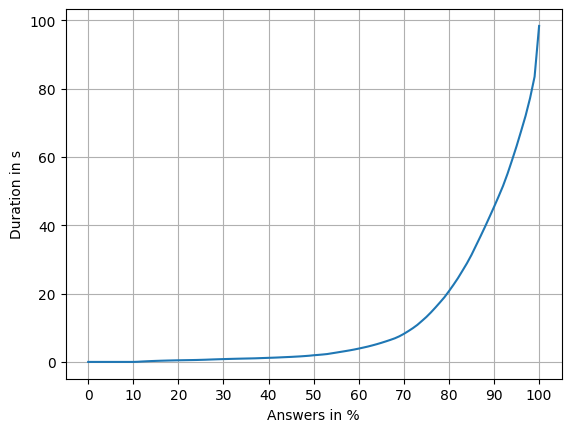

In [16]:
#Effective-Error
prob1 = 0.5 #to choose best
prob2 = 0.5 #to choose worst
errs1 = list((abs(rightdset['Start_timestamp']-rightdset['BestAnswer_start'])*100)/rightdset['Duration'])
errs2 = list((abs(rightdset['Start_timestamp']-rightdset['LongAnswer_start'])*100)/rightdset['Duration'])
errs  = [min(errs1[i], errs2[i])*prob1 + max(errs1[i], errs2[i])*prob2 for i in range(len(errs1))]
showAvgPlots(errs, ylabel='Duration in %')
errs1 = list(abs(rightdset['Start_timestamp']-rightdset['BestAnswer_start']))
errs2 = list(abs(rightdset['Start_timestamp']-rightdset['LongAnswer_start']))
errs  = [errs1[i]*0.5 + errs2[i]*0.5 for i in range(len(errs1))]
showAvgPlots(errs, ylabel='Duration in s')

Answer prediction results (No QA-Model):

In [17]:
dset = noqa_ansdset.join(quesdset)
rightdset = dset[dset['Video_ID'] == dset['Predicted_Video_ID']]
rightdset.head()
#rightdset has only the rows with correct predicted IDs.

,Predicted_Video_ID,BestAnswer_start,BestAnswer_end,Related_Video_IDs,Video_ID,Question,Answer,Start_timestamp,End_timestamp,Duration,Link
0,101,0,75,NaN,101,What is Kubernetes?,kubernetes is an open source container orchest...,64,98,852,https://youtu.be/VnvRFRk_51k
1,101,0,75,NaN,101,Who developed Kubernetes?,Google,69,70,852,https://youtu.be/VnvRFRk_51k
2,101,0,75,NaN,101,Who created Kubernetes?,Google,69,70,852,https://youtu.be/VnvRFRk_51k
3,101,0,75,NaN,101,What is the job of controller manager in Kuber...,controller manager which basically keeps an ov...,321,332,852,https://youtu.be/VnvRFRk_51k
4,101,301,362,406,101,What is the job of scheduler in Kubernetes?,scheduler which is basically responsible for s...,336,360,852,https://youtu.be/VnvRFRk_51k


100% Mean: 12.36
80% Mean: 4.55


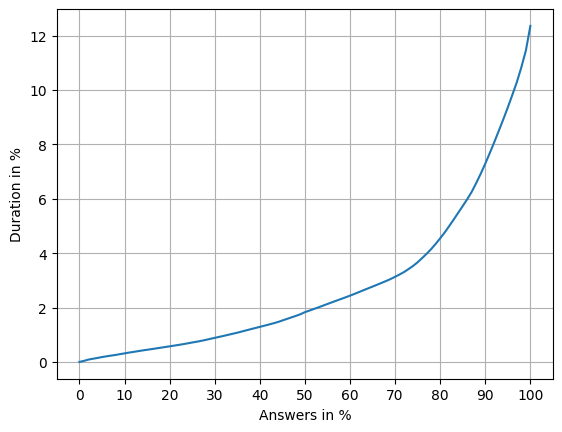

100% Mean: 112.38
80% Mean: 37.17


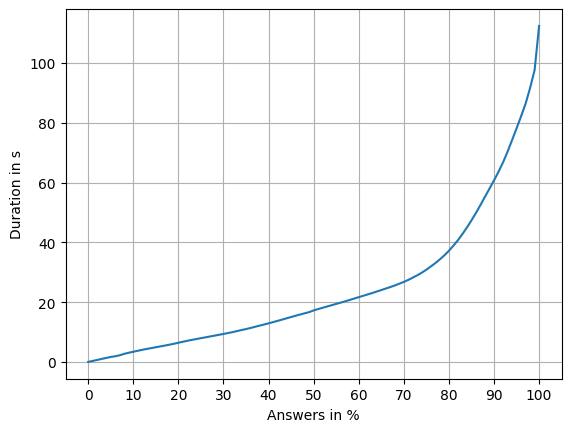

In [18]:
#Best-Answers
errs = list((abs(rightdset['Start_timestamp']-rightdset['BestAnswer_start'])*100)/rightdset['Duration'])
showAvgPlots(errs, ylabel='Duration in %')
errs = list(abs(rightdset['Start_timestamp']-rightdset['BestAnswer_start']))
showAvgPlots(errs, ylabel='Duration in s')